In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps
from scrape import summarize_proj

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.1030997910732303
======= Fold 1 ========
Our accuracy on the validation set is 3.79264288545178
======= Fold 2 ========
Our accuracy on the validation set is 3.524934295685106
======= Fold 3 ========
Our accuracy on the validation set is 3.705072418029522
======= Fold 4 ========
Our accuracy on the validation set is 3.990086634346762
Overall accuracy: 3.62316720491728
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,aj-brown,18.051053,0,1,6
1,amonra-stbrown,17.353535,1,2,7
2,justin-jefferson,17.255051,0,3,1
3,ceedee-lamb,17.174876,0,4,5
4,davante-adams,17.011314,0,5,3
5,stefon-diggs,16.668143,0,6,4
6,jamarr-chase,16.464476,0,7,11
7,jaylen-waddle,16.236005,0,8,8
8,tyreek-hill,15.717343,0,9,2
9,devonta-smith,15.040189,0,10,9


======= Fold 0 ========
Our accuracy on the validation set is 3.318608470930751
======= Fold 1 ========
Our accuracy on the validation set is 3.7944506513806076
======= Fold 2 ========
Our accuracy on the validation set is 3.156087606998711
======= Fold 3 ========
Our accuracy on the validation set is 3.525272370773015
======= Fold 4 ========
Our accuracy on the validation set is 3.957789468197655
Overall accuracy: 3.5504417136561477
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,jamarr-chase,19.9352,0,1,11
1,cooper-kupp,19.7056,1,2,23
2,tyreek-hill,19.1124,0,3,2
3,garrett-wilson,18.9922,0,4,21
4,justin-jefferson,18.8830,0,5,1
5,stefon-diggs,18.8146,0,6,4
6,aj-brown,18.5112,0,7,6
7,davante-adams,17.7060,0,8,3
8,amonra-stbrown,17.6880,1,9,7
9,deebo-samuel,17.1566,1,10,38


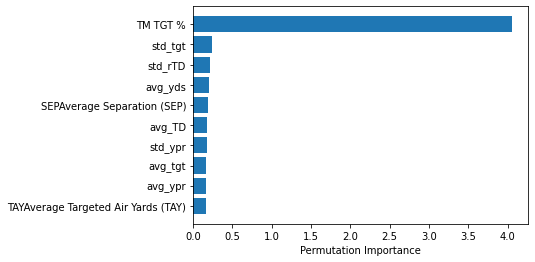

In [3]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [4]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5407869029450465
======= Fold 1 ========
Our accuracy on the validation set is 3.7283535346388867
======= Fold 2 ========
Our accuracy on the validation set is 3.529993661360098
======= Fold 3 ========
Our accuracy on the validation set is 3.5592286696129896
======= Fold 4 ========
Our accuracy on the validation set is 3.9750820299981293
Overall accuracy: 3.6666889597110304
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)


,name,proj fpts,class,rank,last rank
0,justin-jefferson,18.581357,0,1,1
1,tyreek-hill,17.600928,0,2,2
2,ceedee-lamb,17.566494,0,3,5
3,davante-adams,17.489721,0,4,3
4,aj-brown,17.403321,0,5,6
5,amonra-stbrown,16.874070,1,6,7
6,stefon-diggs,16.873997,0,7,4
7,jamarr-chase,15.842732,0,8,11
8,dj-moore-wr,15.507898,0,9,24
9,jaylen-waddle,15.365571,0,10,8


In [5]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022, scoring='HALF')
xgbHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', scoring='HALF')
xgbHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.764157801168757
======= Fold 1 ========
Our accuracy on the validation set is 3.1517929587336333
======= Fold 2 ========
Our accuracy on the validation set is 2.7282499646866625
======= Fold 3 ========
Our accuracy on the validation set is 3.154327655676733
======= Fold 4 ========
Our accuracy on the validation set is 2.8959180118992696
Overall accuracy: 2.938889278433011
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,ceedee-lamb,14.538608,0,1,6
1,amonra-stbrown,14.405290,1,2,8
2,justin-jefferson,14.289659,0,3,1
3,aj-brown,14.090103,0,4,5
4,jamarr-chase,13.902325,0,5,12
5,davante-adams,13.863857,0,6,2
6,stefon-diggs,13.457938,0,7,4
7,jaylen-waddle,13.434714,0,8,7
8,devonta-smith,13.233990,0,9,10
9,tyreek-hill,12.927176,0,10,3


======= Fold 0 ========
Our accuracy on the validation set is 2.793485205063576
======= Fold 1 ========
Our accuracy on the validation set is 2.8093287288917876
======= Fold 2 ========
Our accuracy on the validation set is 3.0815271583919195
======= Fold 3 ========
Our accuracy on the validation set is 2.9223994601442085
======= Fold 4 ========
Our accuracy on the validation set is 2.970277713897207
Overall accuracy: 2.91540365327774
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,cooper-kupp,17.7482,1,1,24
1,jamarr-chase,17.4706,0,2,12
2,amonra-stbrown,16.8684,1,3,8
3,deebo-samuel,16.7932,1,4,38
4,tyreek-hill,16.4566,0,5,3
5,justin-jefferson,16.2280,0,6,1
6,ceedee-lamb,15.8770,0,7,6
7,aj-brown,15.6288,0,8,5
8,stefon-diggs,15.6058,0,9,4
9,chris-godwin,15.3858,2,10,20


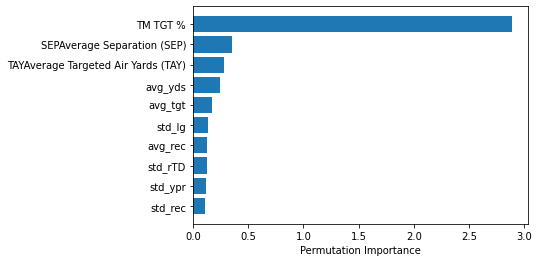

In [6]:
rfHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False, scoring='HALF')
rfHALF_results.head(50)

In [7]:
svrHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', model_='svr', scoring='HALF')
svrHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.864893235349776
======= Fold 1 ========
Our accuracy on the validation set is 3.1747731294725408
======= Fold 2 ========
Our accuracy on the validation set is 2.6565570924783133
======= Fold 3 ========
Our accuracy on the validation set is 3.105096153250619
======= Fold 4 ========
Our accuracy on the validation set is 2.8829568412939084
Overall accuracy: 2.9368552903690315
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)


,name,proj fpts,class,rank,last rank
0,justin-jefferson,14.935355,0,1,1
1,ceedee-lamb,14.665818,0,2,6
2,amonra-stbrown,14.621782,1,3,8
3,tyreek-hill,13.830551,0,4,3
4,davante-adams,13.813990,0,5,2
5,stefon-diggs,13.688299,0,6,4
6,aj-brown,13.584371,0,7,5
7,jamarr-chase,13.584309,0,8,12
8,devonta-smith,13.219590,0,9,10
9,cooper-kupp,13.094221,1,10,24


In [8]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/wr_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,justin-jefferson,18.239803,1
1,aj-brown,17.988525,2
2,tyreek-hill,17.476890,3
3,stefon-diggs,17.452247,4
4,jamarr-chase,17.414136,5
5,davante-adams,17.402345,6
6,amonra-stbrown,17.305202,7
7,ceedee-lamb,17.277990,8
8,cooper-kupp,16.431264,9
9,jaylen-waddle,15.993925,10


In [9]:
summarize_proj('wr', '2022', 'PPR')

,name,rf proj,xgb proj,svr proj,mean proj,rank,last rank
4,justin-jefferson,18.8830,17.255051,18.581357,18.239803,1,1
6,aj-brown,18.5112,18.051053,17.403321,17.988525,2,6
2,tyreek-hill,19.1124,15.717343,17.600928,17.476890,3,2
5,stefon-diggs,18.8146,16.668143,16.873997,17.452247,4,4
0,jamarr-chase,19.9352,16.464476,15.842732,17.414136,5,11
...,...,...,...,...,...,...,...
76,nelson-agholor,5.8098,6.315460,5.557130,5.894130,85,88
75,trent-sherfield,6.0676,5.283927,5.624173,5.658567,86,82
78,kalif-raymond,5.6532,4.932226,6.353668,5.646365,87,57
79,randall-cobb,5.4244,5.952296,5.157662,5.511452,88,86


In [10]:
mean_results_HALF = xgbHALF_results.append([rfHALF_results, svrHALF_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_HALF = mean_results_HALF.reset_index(drop=True)
mean_results_HALF['rank'] = mean_results_HALF.index + 1
mean_results_HALF.to_csv('projections/wr_HALF_2022_mean_projections.csv', index = False)
mean_results_HALF.head(50)

,name,proj fpts,rank
0,amonra-stbrown,15.298491,1
1,justin-jefferson,15.151005,2
2,ceedee-lamb,15.027142,3
3,jamarr-chase,14.985745,4
4,aj-brown,14.434425,5
5,tyreek-hill,14.404776,6
6,cooper-kupp,14.337421,7
7,stefon-diggs,14.250679,8
8,davante-adams,13.439549,9
9,devonta-smith,12.936193,10


In [11]:
summarize_proj('wr', '2022', 'HALF')

,name,rf proj,xgb proj,svr proj,mean proj,rank,last rank
2,amonra-stbrown,16.8684,14.405290,14.621782,15.298491,1,8
5,justin-jefferson,16.2280,14.289659,14.935355,15.151005,2,1
6,ceedee-lamb,15.8770,14.538608,14.665818,15.027142,3,6
1,jamarr-chase,17.4706,13.902325,13.584309,14.985745,4,12
7,aj-brown,15.6288,14.090103,13.584371,14.434425,5,5
...,...,...,...,...,...,...,...
73,nick-westbrook,7.2948,4.126026,5.113896,5.511574,78,72
56,quez-watkins,7.9854,3.174390,4.975871,5.378554,79,77
81,trent-sherfield,6.6480,4.477277,4.921527,5.348935,80,75
80,nelson-agholor,6.6640,3.804993,3.973073,4.814022,81,81
